# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Варианты
1. $y = sin(x_1 + x_2)$
2. $y = cos(x_1 + x_2)$
3. $y = tan(x_1 + x_2) * sin(x_1)$
4. $y = 2 * x_1^2 + 3x_2^2$
5. $y = 5 * log(x_1) * log(2 * x_2)$
6. $y = 5 * log(x_1) * x_2^2$
7. $y = cos(x_1) * x_2^3$
8. $y = \frac{3}{(2 + e^{-2x})}$
9. $y = cos(x_1 + x_2) * x_2 ^ 2$
10. $y = \frac{x_2}{(1 + e^{-x_1})}$
11. $y = \frac{3 * x_1}{(1 - e^{-x_2})}$
12. $y = 0.01 * tan(x_1) * x_2^2$
13. $y = x_1^6 + x_2^2 + x_1^3 + 4x_2 + 5$
14. $y = cos(x_1) * x_2^3$
15. $y = tan(x_1) * ctg(x_2)$
16. $y = \frac{sin(x_1)}{(1 + e^{-2x_2})}$
17. $y = \frac{cos(x_1)}{(1 + e^{-2x_1})}$
18. $y = \frac{tan(x_1)}{(3 + e^{-2x_2})}$
19. $y = \frac{ctg(x_1)}{(2 + e^{-2x_2})}$
20. $y = \frac{x_1^2}{(1 + e^{-2x_2})}$


In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).

In [102]:
# создание равномерно распределенны- значений для x1 и x2 от -1 до 1 с шагом 30
x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)

# создание сетки значений для x1 и x2, чтобы получить все возможные комбинации x1 и x2.
x1, x2 = np.meshgrid(x1, x2)

y = np.cos(x1 + x2)

df = pd.DataFrame({'x1': x1.ravel(), 'x2': x2.ravel(), 'y': y.ravel()})
df.to_csv('graph.csv')

2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 

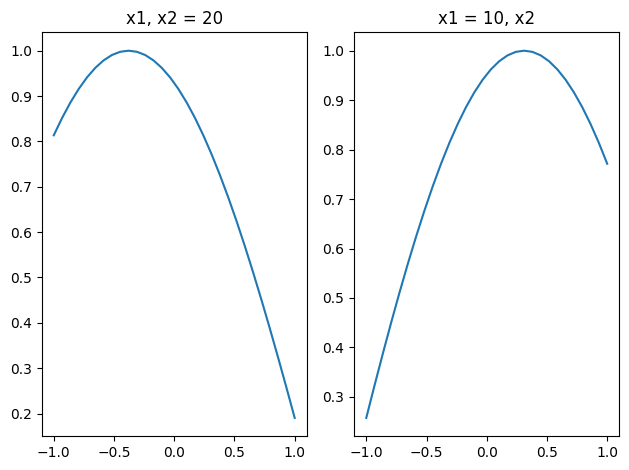

In [103]:
df = pd.read_csv('graph.csv')
x1 = df['x1'].values.reshape(x1.shape)
x2 = df['x2'].values.reshape(x2.shape)
y = df['y'].values.reshape(y.shape)

constX1 = 10
constX2 = 20

# создание графиков 
fig, axs = plt.subplots(1, 2)

# график зависимости y от x1 при фиксированном значении x2
axs[0].plot(x1[constX2, :], y[constX2, :])
axs[0].set_title(f"x1, x2 = {constX2}")

# график зависимости y от x2 при фиксированном значении x1
axs[1].plot(x2[:, constX1], y[:, constX1])
axs[1].set_title(f"x1 = {constX1}, x2")

fig.tight_layout()
plt.show()

3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.

In [104]:
for name in df.columns[1:]:
    print(f"name: {name}    avg: {df[name].mean()}  min: {df[name].min()}   max: {df[name].max()}")

name: x1    avg: -1.8750433304780422e-17  min: -1.0   max: 1.0
name: x2    avg: -3.157967714489334e-17  min: -1.0   max: 1.0
name: y    avg: 0.6907431682212648  min: -0.4161468365471424   max: 1.0


4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$

In [105]:
filtered_df = df[(df['x1'] < df['x1'].mean()) | (df['x2'] < df['x2'].mean())]

filtered_df.to_csv('filtered_graph.csv')

5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

Text(0.5, 0.92, 'График')

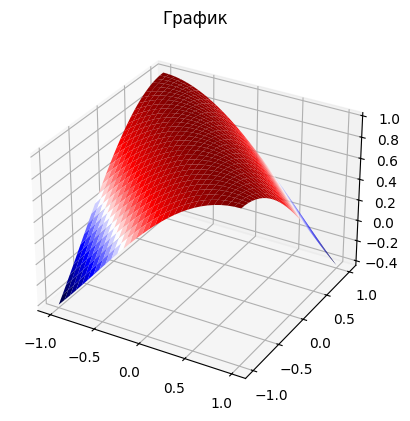

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, y, cmap='seismic')
ax.set_title('График')